<a href="https://colab.research.google.com/github/MustaineWT/Yolo3v/blob/master/Testeo2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# clone darknet repo
!git clone https://github.com/AlexeyAB/darknet

In [ ]:
# change makefile to have GPU and OPENCV enabled
%cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile

In [ ]:
# verify CUDA
!/usr/local/cuda/bin/nvcc --version

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
# make darknet (build)
!make

In [ ]:
# get yolov3 pretrained coco dataset weights
!wget https://pjreddie.com/media/files/yolov3.weights

In [69]:
# define helper functions
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

# use this to upload files
def upload():
  from google.colab import files
  uploaded = files.upload() 
  for name, data in uploaded.items():
    with open(name, 'wb') as f:
      f.write(data)
      print ('saved file', name)
      
def download(path):
  from google.colab import files
  files.download(path)

In [50]:

# use this to download a file  
def downloaddrive(each_image):
  import os  
  !cp "./darknet/predictions.jpg" "./darknet/results"
  destino="./darknet/results/"+each_image
  os.replace("./darknet/results/predictions.jpg",destino)
  !cp "./darknet/results/{each_image}" "/content/drive/My Drive/yolo/resImagenes"
   

In [53]:
def procesar():
  import os
  import cv2
  from os.path import basename
  
  items = os.listdir('/content/drive/My Drive/yolo/Imagenes')
  for each_image in items:
    #do_something(file)  
    !./darknet detector test cfg/cf/obj.data cfg/cf/yolov3_custom.cfg cfg/cf/yolov3_custom_last.weights each_image -thresh 0.3
    downloaddrive(each_image)
    #imShow('predictions.jpg')
    #download('predictions.jpg')

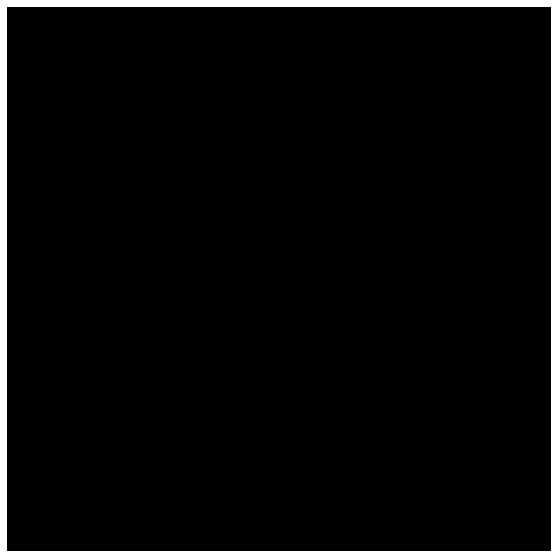

In [70]:
#procesar()
#downloaddrive('2.jpg')
#!./darknet/darknet detector test /content/darknet/cfg/cf/obj.data /content/darknet/cfg/cf/yolov3_custom.cfg /content/darknet/cfg/cf/yolov3_custom_last.weights 5da26554e02ac.jpg -thresh 0.3
imShow('predictions.jpg')


In [ ]:
# run darknet detection
!./darknet detect cfg/yolov3.cfg yolov3.weights data/person.jpg


In [ ]:
!./darknet detect cfg/yolov3.cfg yolov3.weights data/dog.jpg
imShow('predictions.jpg')

In [ ]:
!./darknet detect cfg/yolov3.cfg yolov3.weights data/transito.png
imShow('predictions.jpg')

In [ ]:
!./darknet detect cfg/yolov3.cfg yolov3.weights data/ptenuevo.jpg
imShow('predictions.jpg')
download('predictions.jpg')

In [66]:
#!ls Copiar modelos cifrut
#!cp "/content/drive/My Drive/yolo/backup/yolov3_custom_1000.weights" "./cfg/cf"
#!cp "/content/drive/My Drive/yolo/backup/yolov3_custom_2000.weights" "./cfg/cf"
#!cp "/content/drive/My Drive/yolo/backup/yolov3_custom_final.weights" "./cfg/cf"
#!cp "/content/drive/My Drive/yolo/backup/yolov3_custom_last.weights" "./cfg/cf"
#!cp "/content/drive/My Drive/yolo/backup/yolov3_custom.cfg" "./cfg/cf"
#!cp "/content/drive/My Drive/yolo/objetos/obj.names" "./data"
!cp "/content/drive/My Drive/yolo/objetos/obj.data" "./darknet/cfg/cf"

In [12]:
#!ls Copiar modelos botellas
!cp "/content/drive/My Drive/yolo/AJE/obj_bebidas.weight" "./cfg/botellas"
!cp "/content/drive/My Drive/yolo/AJE/obj_ajp.weights" "./cfg/botellas"
!cp "/content/drive/My Drive/yolo/AJE/Data/obj-1.names" "./cfg/botellas"
!cp "/content/drive/My Drive/yolo/AJE/Data/obj.data" "./cfg/botellas"
!cp "/content/drive/My Drive/yolo/AJE/CFG/obj.cfg" "./cfg/botellas"

In [ ]:
#!cp "/content/drive/My Drive/yolo/objetos/obj.names" "./data" 
!cp "/content/drive/My Drive/yolo/objetos/obj.data" "./data" 

In [ ]:
!cp "/content/drive/My Drive/yolo/objetos/generate_train.py" "./" 

In [ ]:
!python generate_train.py

In [ ]:
!wget http://pjreddie.com/media/files/darknet53.conv.74

In [ ]:
!./darknet detector train data/obj.data cfg/yolov3_custom.cfg darknet53.conv.74 -dont_show

In [ ]:
!/content/darknet/darknet detector train data/obj.data cfg/yolov3_custom.cfg cfg/yolov3_custom_last.weights -dont_show

In [10]:
%cd cfg
!sed -i 's/batch=64/batch=1/' yolov3_custom.cfg
!sed -i 's/subdivisions=64/subdivisions=1/' yolov3_custom.cfg
%cd ..

/content/darknet/cfg
sed: can't read yolov3_custom.cfg: No such file or directory
sed: can't read yolov3_custom.cfg: No such file or directory
/content/darknet


In [ ]:
!./darknet detector test cfg/botellas/obj.data cfg/botellas/obj.cfg cfg/botellas/obj_ajp.weights 5f0f681f83804.jpg -thresh 0.3

imShow('predictions.jpg')

#!./darknet detect cfg/yolov3_custom.cfg yolov3_custom.weights "./5da1508a7c863.jpg" #-thresh 0.3
# imShow('predictions.jpg')
# download('predictions.jpg')